# Fatoração de Cholesky

In [1]:
%matplotlib inline

## Matrizes positivas definidas

**Definição (baseada em autovalores)** uma matriz ${\bf A}$ é _positiva definida_ se todos os seus autovalores são positivos ($\lambda > 0$). 

Entretanto, não é conveniente computar todos os autovalores de uma matriz para saber se ela é ou não positiva definida. Há meios mais rápidos de fazer este teste como o da "energia".  

**Definição (baseada em energia)**: uma matriz ${\bf A}$ é _positiva definida_ se ${\bf x}^T {\bf A} {\bf x} > 0$ para todo vetor não-nulo ${\bf x}$.

Para a ordem $n=2$, temos os eguinte resultado: 

$${\bf x}^T {\bf A} {\bf x} = 
\left[\begin{matrix}x_{1} & x_{2}\end{matrix}\right]
\left[\begin{matrix}a_{11} & a_{12}\\a_{12} & a_{22}\end{matrix}\right]
\left[\begin{matrix}x_{1}\\x_{2}\end{matrix}\right]
= a_{11} x_{1}^{2} + 2 a_{12} x_{1} x_{2} + a_{22} x_{2}^{2} > 0$$
Em muitas aplicações, este número é a "energia" no sistema.

O código abaixo mostra que esta multiplicação produz uma forma quadrática para a ordem $n$. 


In [2]:
import sympy as sp
sp.init_printing(use_unicode=True)

x1,x2,x3 = sp.symbols('x1,x2,x3')

# ordem do sistema
n = 3

x = sp.zeros(1,n)
A = sp.zeros(n,n)
aux = 0*A;
for i in range(n):
    x[i] = sp.symbols('x' + str(i+1))
    for j in range(n):    
        if i == j: # diagonal
            A[i,i] = sp.symbols('a' + str(i+1) + str(i+1))        
        elif j > i: # triang. superior
            aux[i,j] = sp.symbols('a' + str(i+1) + str(j+1))        

# matriz
A = A + aux.T + aux # compõe D + L + U
A = sp.Matrix(A)

# vetor
x = sp.Matrix(x)
x = x.T

# matriz positiva definida
c = (x.T)*A*x

# expressãoo quadrática
sp.expand(c[0])


Ainda falando sobre o caso $n=2$, observamos que os autovalores da matriz ${\bf A}$ são positivos se, e somente se 

$$a_{11}>0 \qquad  \text{e} \qquad  a_{11}a_{22} - a_{12}^2 > 0.$$ 

Na verdade, esta regra vale para todos os **pivôs**. Estes dois últimos valores são os pivôs de uma matriz simétrica 2x2 (verifique a eliminação de Gauss quando aplicada à segunda equação). 

A teoria da Álgebra Linear permite-nos elencar as seguintes declarações, **todas equivalentes**, acerca da determinação de uma matriz positiva definida ${\bf A}$: 

1. Todos os seus $n$ pivôs são positivos. 

2. Todos os determinantes menores superiores esquerdos (ou principais) são positivos (veja Critério de Sylvester). 

3. Todos os seus $n$ autovalores são positivos. 

4. ${\bf x}^T {\bf A}{\bf x} > 0$ para todo vetor não-nulo ${\bf x}$. (Definição baseada na "energia").

5. ${\bf A} = {\bf G}{\bf G}^T$ para uma matriz ${\bf G}$ com colunas independentes. 

### Interpretação geométrica 

Matrizes positivas definidas realizam transformações "limitadas" no sentido de "semiplano" do vetor transformado. Por exemplo, se tomarmos um vetor ${\bf x} \in \mathbb{R}^2$ não-nulo e usarmos o fato de que para uma matriz positiva definida, a inequação ${\bf x}^T{\bf A}{\bf x} > 0$ deve valer, ao chamarmos ${\bf y} = {\bf A}{\bf x}$, a expressão anterior é o produto interno entre ${\bf x}$ e ${\bf y}$, a saber ${\bf x}^T{\bf y}$. Se o produto interno é positivo, já sabemos que os vetores não são ortogonais. Agora, para verificar que eles realmente pertencem a um mesmo semiplano, usaremos a seguinte expressão para o ângulo entre dois vetores: 

$$\cos(\theta) = \dfrac{{\bf x}^T {\bf y}}{||{\bf x}||{\bf y}||}$$

Uma vez que a norma (comprimento) de um vetor é sempre um número real positivo, o produto $||{\bf x}||{\bf y}||$ no denominador acima é um número real positivo. Se ${\bf x}^T {\bf y}$ > 0, então $\cos(\theta) > 0$, e o efeito geométrico da transformação é   

$$|\theta| < \frac{\pi}{2},$$

ou seja, o ângulo entre ${\bf x}$ e ${\bf y}$ é sempre menor do que 90 graus (ou $\pi/2$ radianos). 

## Método da Fatoração de Cholesky

Trata-se de um algoritmo para resolução de sistemas lineares ${\bf A}{\bf x} = {\bf b}$ através da decomposição da matriz ${\bf A}$ em dois fatores simétricos, ${\bf G}$ e ${\bf G}^T$. O método é aplicável apenas a sistemas cuja matriz associada é simétrica e positiva definida.

### Passos

- Primeiramente, é necessário checar se a matriz associada ao sistema cumpre os requisitos da fatoração de Cholesky:
    - **Simetria**: a matriz é simétrica quando sua transposta é igual a ela própria:
$$A=A^T$$
    - **Definição positiva**: averiguamos se o Critério de Sylvester é satisfeito. Ou seja, verificamos se todos os determinantes menores principais da matriz, constituídos pelas $k$ primeiras linhas e $k$ primeiras colunas dela, são maiores do que zero:

$$\det({\bf A}_k) > 0\text{, onde } k=1,2,\ldots,n \text{ para matrizes }A_{nxn}$$

Concluídas as verificações anteriores, decompomos a matriz ${\bf A}_{nxn}$ em uma triangular inferior ${\bf A}$ e sua transposta ${\bf A}^T$, a qual é triangular superior.  O processo é descrito abaixo:

- Para uma matriz $A_{4x4}$ obtém-se o fator de Cholesky da seguinte forma:

$${\bf A} = {\bf G}{\bf G}^T \Rightarrow
 \begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14} \\
a_{21} & a_{22} & a_{23} & a_{24} \\
a_{31} & a_{32} & a_{33} & a_{34} \\
a_{41} & a_{42} & a_{43} & a_{44}
 \end{bmatrix} =
 \begin{bmatrix}
g_{11} &             &            &              \\
g_{21} & g_{22} &            &              \\
g_{31} & g_{32} & g_{33} &             \\
g_{41} & g_{42} & g_{43} & g_{44} \\
 \end{bmatrix}
 \begin{bmatrix}
g_{11} & g_{21} & g_{31} &  g_{41} \\
            & g_{22} & g_{32} & g_{42} \\
            &             & g_{33} & g_{43} \\
           &              &             & g_{44} \\
 \end{bmatrix}
$$

- Este sistema pode ser resolvido comparando cada coluna de ${\bf A}$ com a multiplicação de ${\bf G}$ por cada coluna de ${\bf G}^T$ de maneira que ${\bf x}_{kxn} = {\bf G}{\bf G}^T_{kxn}, \, k = 1,2,\ldots, n$. Através dessa sequência são obtidos sistemas simples, em que cada coluna $k$ terá os valores de $g_{kn}$e, após a atualização do iterador $k \rightarrow k + 1$, não será necessário resolver novamente as $k − 1$ linhas do próximo sistema gerado.

De posse dos valores que geram as matrizes triangulares, é possível seguir para a última etapa, a qual consiste em obter o vetor ${\bf x}$ fazendo

$${\bf A}{\bf x}={\bf b} \implies ({\bf G}{\bf G}^T){\bf x}={\bf b} \implies {\bf G}({\bf G}^T{\bf x})={\bf b} \implies {\bf G}{\bf y}=B.$$

Aqui, usamos o mesmo processo utilizado na Fatoração LU. Primeiramente, obtemos o vetor ${\bf y}$ após a resolução do sistema ${\bf G}{\bf y} = {\bf b}$. Enfim, obtemos ${\bf x}$ através da relação ${\bf G}^T {\bf x} = {\bf y}$. Fazendo com que, assim, seja obtido o vetor ${\bf x}$ que resolve o sistema linear proposto no inicio.

## Algoritmo para a fatoração de Cholesky

O código abaixo é uma implementação de um algoritmo para a fatoração de Cholesky por computação simbólica.

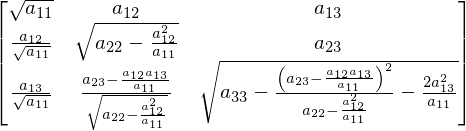

In [3]:
# implementação de algoritmo simbólico 
# para a decomposição de Cholesky 

B = A[:,:] # faz cópia da matriz A

for k in range(0,n):
    for i in range(0,k):
        s = 0.
        for j in range(0,i):
            s += B[i,j]*B[k,j]
        B[k,i] = (B[k,i] - s)/B[i,i]
    s = 0.
    for j in range(0,k):
        s += s + B[k,j]*B[k,j]
    B[k,k] = sp.sqrt(B[k,k] - s)

# saída 
B

#### Tarefa 

Converta o código simbólico acima para uma versão numérica (ou implemente a sua própria versão) e aplique-o na matriz abaixo para encontrar o fator de Cholesky: 

$$\textbf{A} = 
\begin{bmatrix}
6 & 15 & 55 \\
15 & 55 & 225 \\
55 & 225 & 979 
\end{bmatrix}$$

## Cálculo do fator de Cholesky com Python

Matriz A = 
 [[16 -4 12 -4]
 [-4  2 -1  1]
 [12 -1 14 -2]
 [-4  1 -2 83]]
Matriz L = 
 [[ 4.  0.  0.  0.]
 [-1.  1.  0.  0.]
 [ 3.  2.  1.  0.]
 [-1.  0.  1.  9.]]
Matriz L^T = 
 [[ 4. -1.  3. -1.]
 [ 0.  1.  2.  0.]
 [ 0.  0.  1.  1.]
 [ 0.  0.  0.  9.]]
Matriz LL^T = 
 [[16. -4. 12. -4.]
 [-4.  2. -1.  1.]
 [12. -1. 14. -2.]
 [-4.  1. -2. 83.]]
Norma || A - LL^T || =  0.0


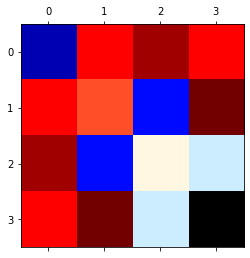

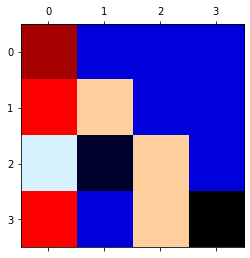

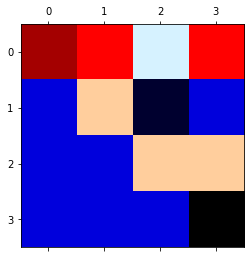

In [4]:
import matplotlib.pyplot as plt
from scipy import array, linalg, dot, zeros

# matriz
A = array([[16, -4, 12, -4],
           [-4, 2, -1, 1],
           [12, -1, 14, -2],
           [-4, 1, -2, 83]])

# fator de Cholesky do Scipy
L = linalg.cholesky(A, lower=True, overwrite_a=False, check_finite=True)

# fator de Cholesky implementado
n = A.shape[0]
G = zeros(A.shape, dtype=float)

print('Matriz A = \n', A)
print('Matriz L = \n', L)
print('Matriz L^T = \n', L.T)

# prova real por produto interno
A2 = dot(L, L.T)
print('Matriz LL^T = \n', A2)

# prova real usando norma de Frobenius da diferenca de matrizes
print('Norma || A - LL^T || = ', linalg.norm(A-A2))

plt.matshow(A,cmap=plt.cm.flag);
plt.matshow(L,cmap=plt.cm.flag);
plt.matshow(L.T,cmap=plt.cm.flag);

In [5]:
from IPython.core.display import HTML

def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling();